In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

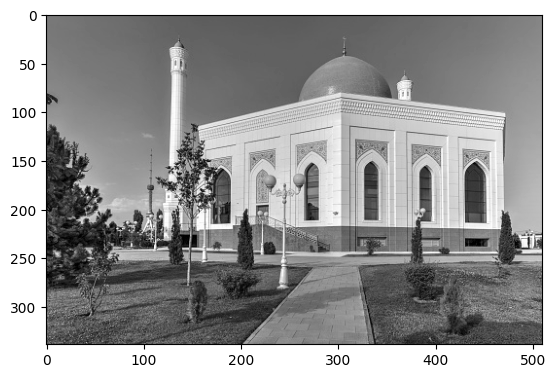

In [24]:
img = cv2.imread('images/Toshkent.png', 0)

img_norm = img.astype(float) / 255

plt.imshow(img_norm, cmap='gray')
plt.show()

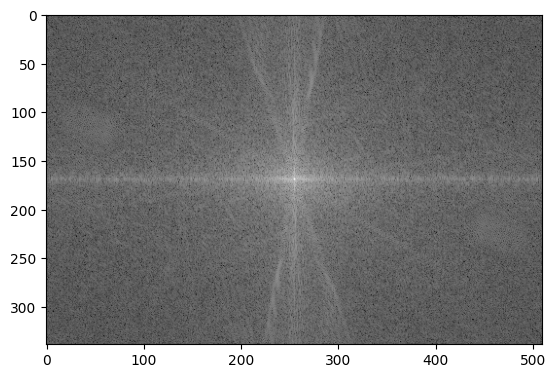

In [25]:
f = np.fft.fft2(img_norm)
fshift = np.fft.fftshift(f)

chastota = np.log(np.abs(fshift))

plt.imshow(chastota, cmap='gray')
plt.show()

In [26]:
img.shape

(339, 510)

In [27]:
row, col = img.shape

crow, ccol = row // 2, col // 2

In [28]:
crow, ccol

(169, 255)

In [29]:
mask = np.ones((row, col), np.uint8)

In [30]:
x, y = np.ogrid[:row, :col]

In [31]:
x.shape

(339, 1)

In [32]:
y.shape

(1, 510)

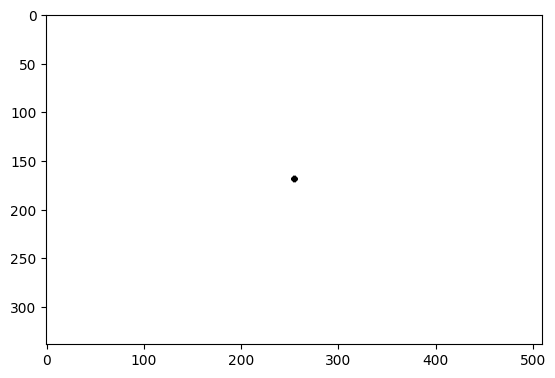

In [33]:
r = 2

mask_area = (x - crow) ** 2 + (y - ccol) ** 2 <= 3.14 * r ** 2
mask[mask_area] = 0

plt.imshow(mask, cmap='gray')
plt.show()

C:\Users\mrumi\AppData\Local\Temp\ipykernel_13820\1146354355.py:3: RuntimeWarning: divide by zero encountered in log
  fr1 = np.log(np.abs(fshift1))


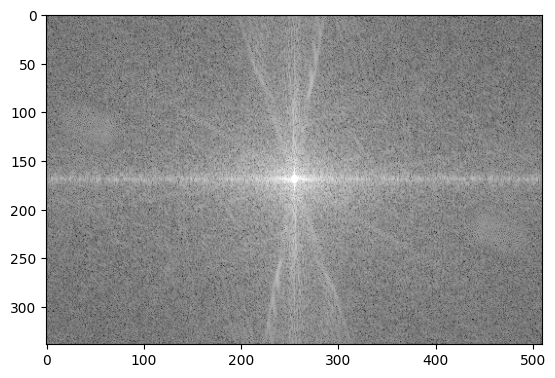

In [34]:
fshift1 = fshift * mask

fr1 = np.log(np.abs(fshift1))

plt.imshow(fr1, cmap='gray')
plt.show()

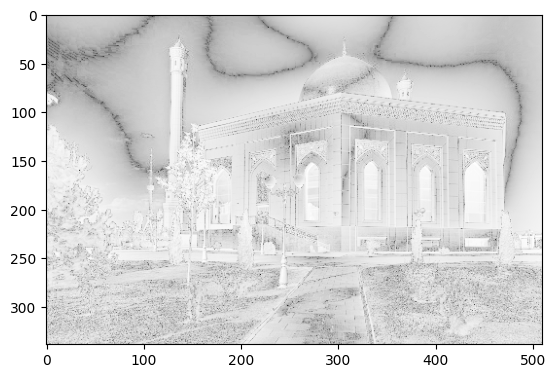

In [35]:
f_ishift = np.fft.ifftshift(fshift1)
img_back = np.fft.ifft2(f_ishift)

img_back = np.log(np.abs(img_back))
plt.imshow(img_back, cmap='gray')
plt.show()

# Home work

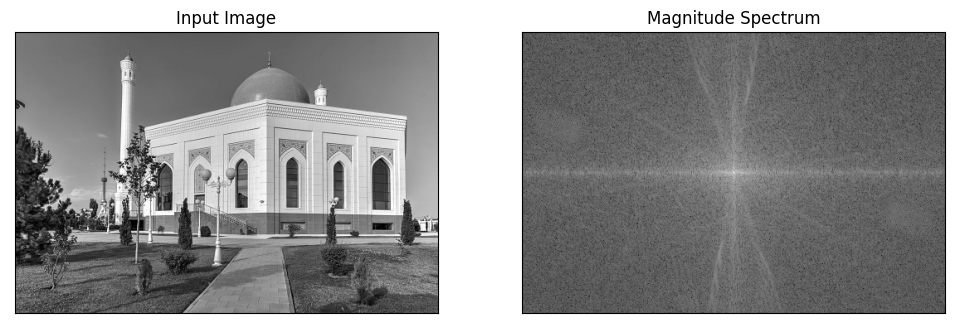

In [44]:
img = cv2.imread('images/Toshkent.png', 0)
f = np.fft.fft2(img / 255.0)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.figure(figsize=(12, 10))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title("Magnitude Spectrum"), plt.xticks(
    []), plt.yticks([])
plt.show()

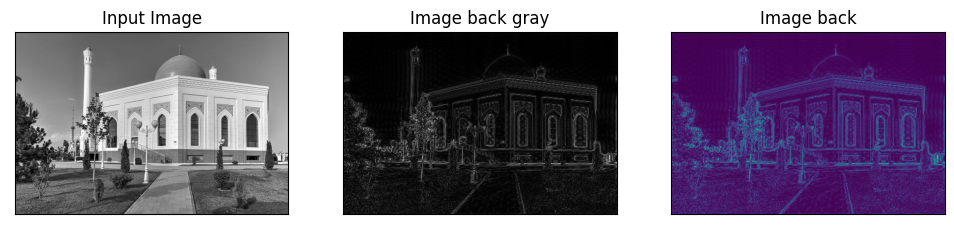

In [52]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

fshift[crow-5:crow+5, ccol-5:ccol+5] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(12, 10))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_back, cmap='gray'), plt.title("Image back gray"), plt.xticks(
    []), plt.yticks([])
plt.subplot(133), plt.imshow(img_back), plt.title("Image back"), plt.xticks(
    []), plt.yticks([])
plt.show()